In [1]:
drive_path = 'c:/'
import numpy as np
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
%matplotlib
from scipy.stats import ks_2samp
from scipy.stats import anderson_ksamp
from scipy.stats import kruskal
from scipy.stats import variation
from scipy import signal as sps
import seaborn as sns
import glob
import re

Using matplotlib backend: Qt4Agg


In [2]:
trials=pd.read_csv('C:\\Users\\Annie\\Documents\\Data\\Ca_Imaging\\Analysis\\Odor_Panel\\Odor_Trials.csv')
# filerow=trials.loc[trials['File']==date]
# odortrials={}
# for t in trials.Odor.unique():
#     y={t:[int(x) for x in filerow.loc[filerow['Odor'] == t][['T1','T2','T3','T4']].values.tolist()[0]]}
#     odortrials.update(y)

In [3]:
fullpeak=pd.DataFrame([])
for date in trials.File.unique():
    #reorganize dataframes
    mean=pd.read_csv('C:\\Users\\Annie\\Documents\\Data\\Ca_Imaging\\GoodFiles\\{0}\\{1}_mean.csv'.format(unicode(date,'utf-8'),unicode(date,'utf-8')))
    mdf=pd.concat([mean['Odor'],mean[[col for col in mean.columns if ')_' in col]]],axis=1)
    temp=mdf.T
    temp.reset_index(level=0, inplace=True)
    temp.columns = temp.iloc[0]
    temp=temp.reindex(temp.index.drop(0))
    temp.rename(columns={'Odor':'Mouse'}, inplace=True)
    temp=temp.reset_index(drop=True)
    group=[]
    for x in list(temp.index.values):
        temp.iloc[x]['Mouse']=temp.iloc[x]['Mouse'].split(')_')[1]
        indexnum=trials.File.unique().tolist().index(temp['Mouse'][x])
        groupname=trials.loc[trials.File==trials.File.unique()[indexnum]].Group.iloc[0]
        group.append(groupname)
    group=pd.DataFrame({'Group':group})
    temp=pd.concat([group,temp],axis=1)
    fullpeak=fullpeak.append(temp)
fullpeak=fullpeak.reset_index(drop=True)
# fullpeak.to_csv('C:\\Users\\Annie\\Documents\\Data\\Ca_Imaging\\GoodFiles\\fullpeak.csv',index=False)

In [3]:
#THIS ONE KEEPS THE CELL INDEX
fullpeak=pd.DataFrame([])
for date in trials.File.unique():
    #reorganize dataframes
    mean=pd.read_csv('C:\\Users\\Annie\\Documents\\Data\\Ca_Imaging\\GoodFiles\\{0}\\{1}_mean.csv'.format(unicode(date,'utf-8'),unicode(date,'utf-8')))
    mdf=pd.concat([mean['Odor'],mean[[col for col in mean.columns if ')_' in col]]],axis=1)
    temp=mdf.T
    temp.reset_index(level=0, inplace=True)
    temp.columns = temp.iloc[0]
    temp=temp.reindex(temp.index.drop(0))
    temp.rename(columns={'Odor':'Mouse'}, inplace=True)
    temp=temp.reset_index(drop=True)
    group=[]
    for x in list(temp.index.values):
        mouse=temp.iloc[x]['Mouse'].split(')_')[1]
        indexnum=trials.File.unique().tolist().index(mouse)
        groupname=trials.loc[trials.File==trials.File.unique()[indexnum]].Group.iloc[0]
        group.append(groupname)
    group=pd.DataFrame({'Group':group})
    temp=pd.concat([group,temp],axis=1)
    fullpeak=fullpeak.append(temp)
CLfullpeak=fullpeak.reset_index(drop=True)
# fullpeak.to_csv('C:\\Users\\Annie\\Documents\\Data\\Ca_Imaging\\GoodFiles\\fullpeak_WL.csv',index=False)

In [5]:
fullsuccess=pd.DataFrame([])
for date in trials.File.unique():
    #reorganize dataframes
    dframe=pd.read_csv('C:\\Users\\Annie\\Documents\\Data\\Ca_Imaging\\GoodFiles\\{0}\\{1}_success.csv'.format(unicode(date,'utf-8'),unicode(date,'utf-8')))
    sdf=pd.concat([dframe['Odor'],dframe[[col for col in dframe.columns if ')_' in col]]],axis=1)
    temp=sdf.T
    temp.reset_index(level=0, inplace=True)
    temp.columns = temp.iloc[0]
    temp=temp.reindex(temp.index.drop(0))
    temp.rename(columns={'Odor':'Mouse'}, inplace=True)
    temp=temp.reset_index(drop=True)
    group=[]
    for x in list(temp.index.values):
        temp.iloc[x]['Mouse']=temp.iloc[x]['Mouse'].split(')_')[1]
        indexnum=trials.File.unique().tolist().index(temp['Mouse'][x])
        groupname=trials.loc[trials.File==trials.File.unique()[indexnum]].Group.iloc[0]
        group.append(groupname)
    group=pd.DataFrame({'Group':group})
    temp=pd.concat([group,temp],axis=1)
    fullsuccess=fullsuccess.append(temp)
fullsuccess=fullsuccess.reset_index(drop=True)
# fullsuccess.to_csv('C:\\Users\\Annie\\Documents\\Data\\Ca_Imaging\\GoodFiles\\fullsuccess.csv',index=False)

In [6]:
# WITH CELL LABELS
fullsuccess=pd.DataFrame([])
for date in trials.File.unique():
    #reorganize dataframes
    dframe=pd.read_csv('C:\\Users\\Annie\\Documents\\Data\\Ca_Imaging\\GoodFiles\\{0}\\{1}_success.csv'.format(unicode(date,'utf-8'),unicode(date,'utf-8')))
    sdf=pd.concat([dframe['Odor'],dframe[[col for col in dframe.columns if ')_' in col]]],axis=1)
    temp=sdf.T
    temp.reset_index(level=0, inplace=True)
    temp.columns = temp.iloc[0]
    temp=temp.reindex(temp.index.drop(0))
    temp.rename(columns={'Odor':'Mouse'}, inplace=True)
    temp=temp.reset_index(drop=True)
    group=[]
    for x in list(temp.index.values):
        mouse=temp.iloc[x]['Mouse'].split(')_')[1]
        indexnum=trials.File.unique().tolist().index(mouse)
        groupname=trials.loc[trials.File==trials.File.unique()[indexnum]].Group.iloc[0]
        group.append(groupname)
    group=pd.DataFrame({'Group':group})
    temp=pd.concat([group,temp],axis=1)
    fullsuccess=fullsuccess.append(temp)
CLfullsuccess=fullsuccess.reset_index(drop=True)
# fullsuccess.to_csv('C:\\Users\\Annie\\Documents\\Data\\Ca_Imaging\\GoodFiles\\fullsuccess_WI.csv',index=False)

# Graph Successes

In [4]:
df=fullsuccess.drop(['Mouse'],axis=1)
df=pd.melt(df,'Group',var_name='Odor')

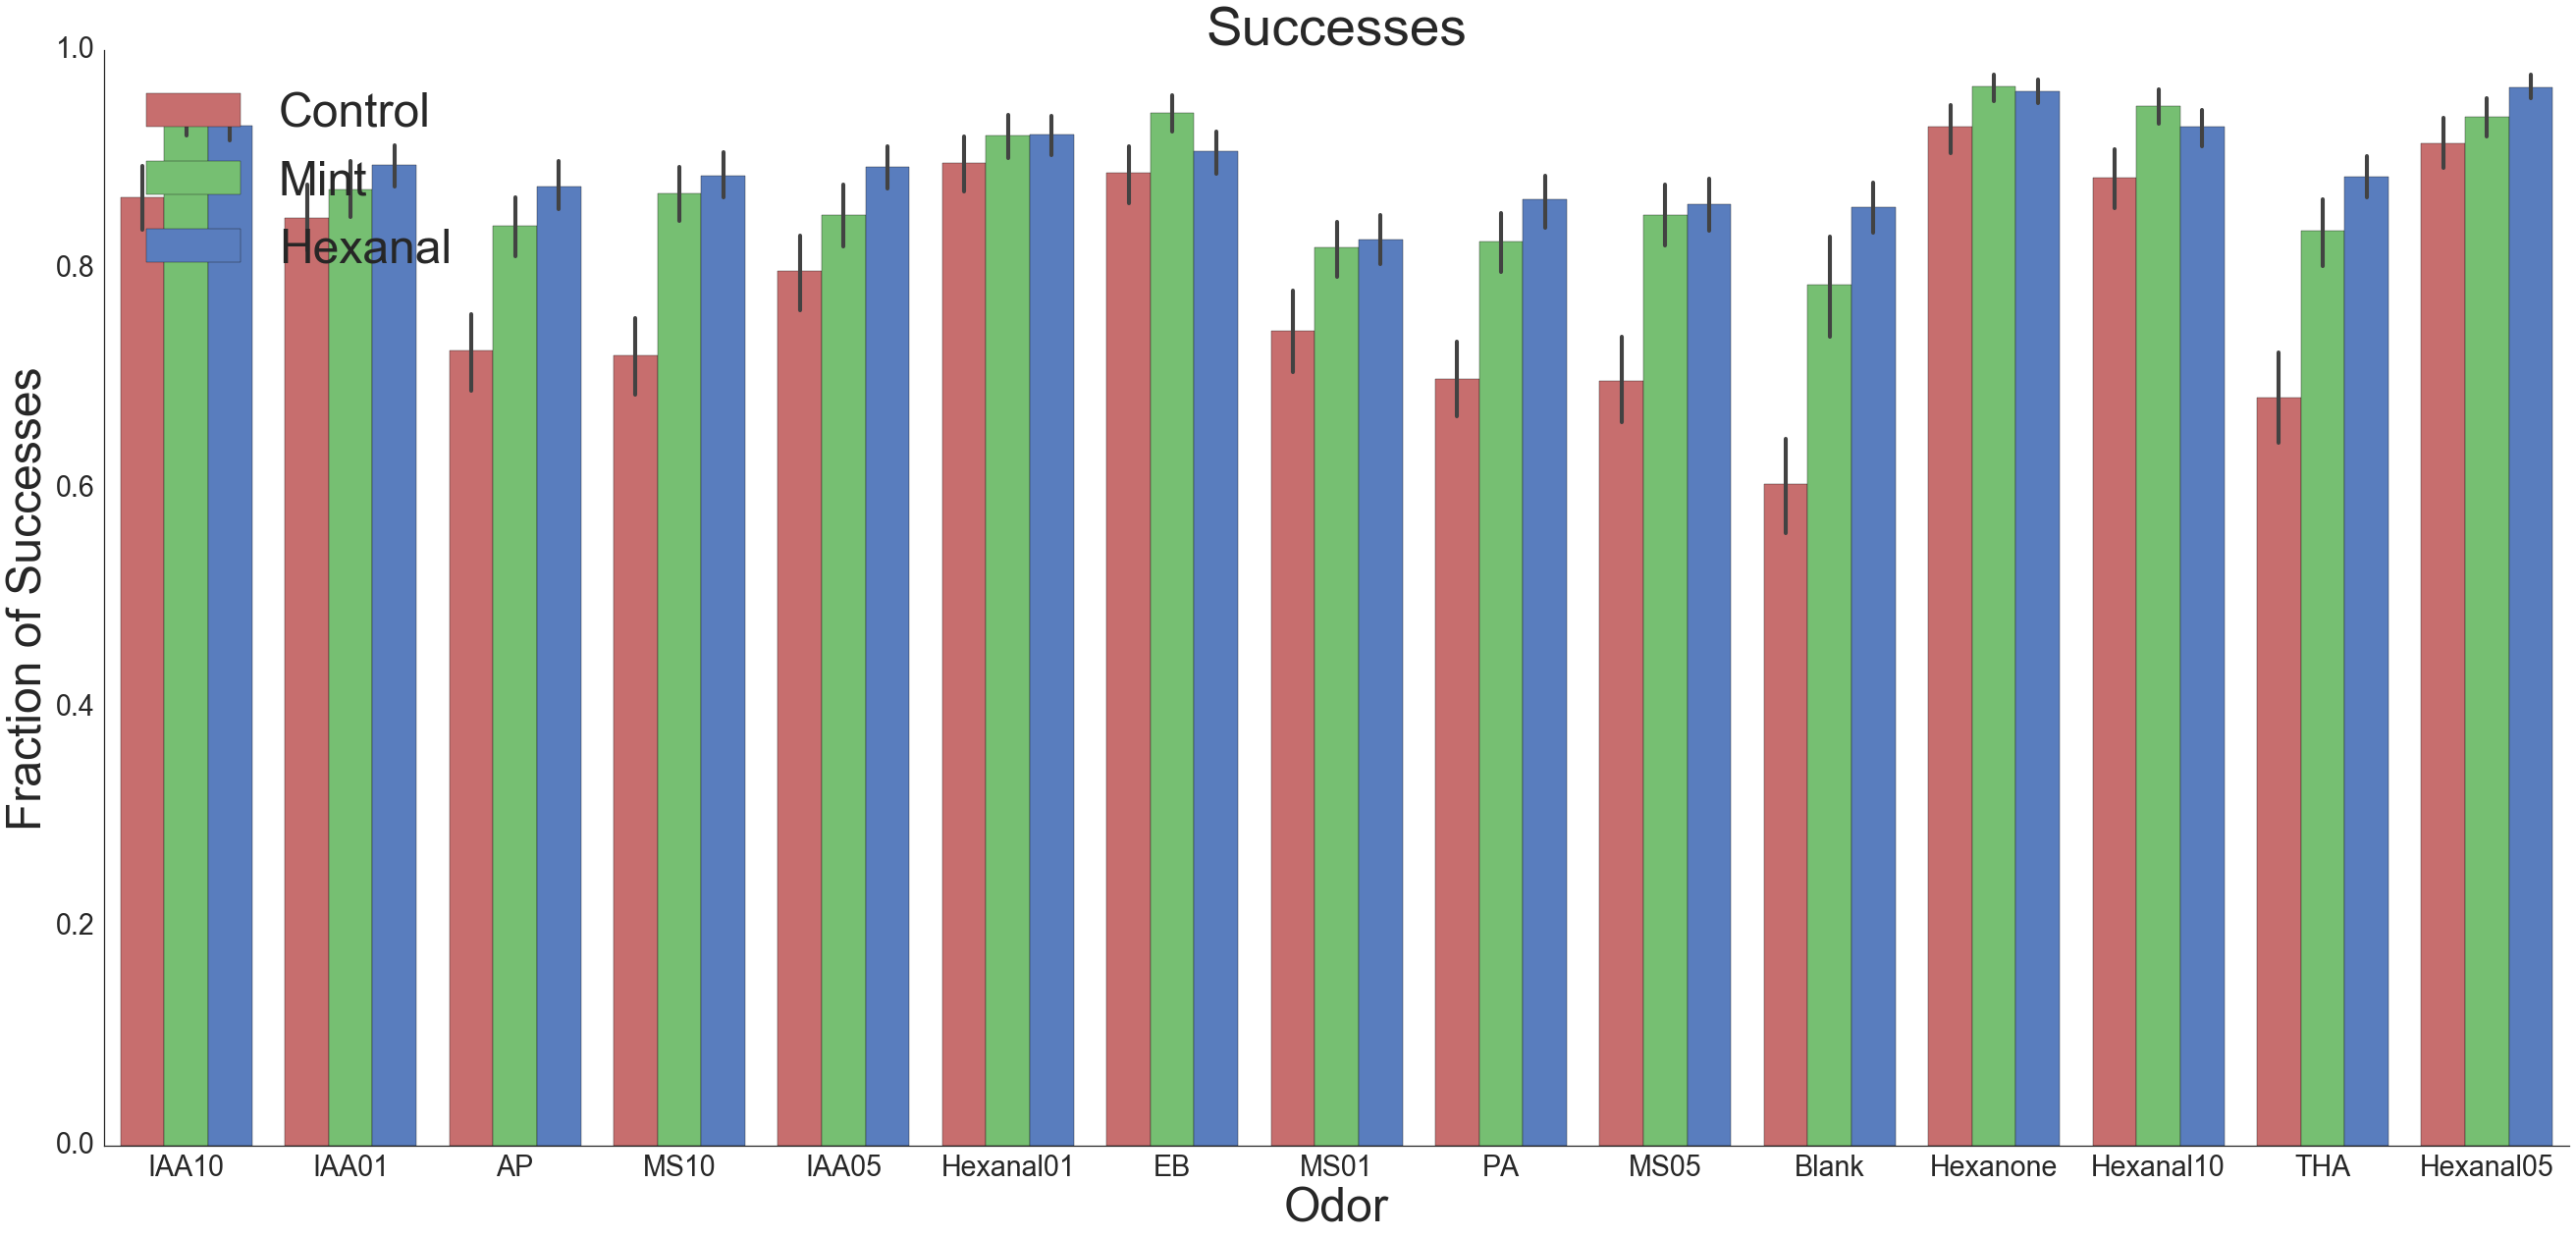

In [24]:
sns.set(style="white", palette="muted", color_codes=True);
sns.set_context("talk", font_scale=2.2);
plt.figure(figsize=(45, 20));
ax = sns.barplot(x="Odor", y="value", hue="Group", palette={"Control": "r", "Hexanal": "b", "Mint": "g"},
                 data=df);
sns.despine()
plt.ylabel('Fraction of Successes', fontsize=48);
plt.title('Successes', fontsize=55);
plt.xlabel('Odor', fontsize=48);
plt.legend(loc=2, prop={'size': 48});

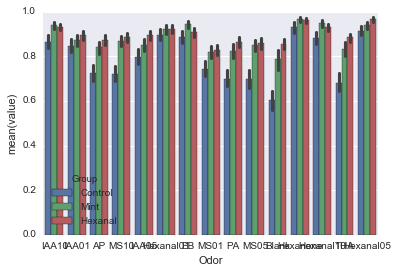

In [21]:
# plt.plot(df[df.Group=='Control']['IAA10']);
sns.barplot(x='Odor',y='value',hue='Group',data=df);

In [7]:
fullint=pd.DataFrame([])
for date in trials.File.unique():
    #reorganize dataframes
    dframe=pd.read_csv('C:\\Users\\Annie\\Documents\\Data\\Ca_Imaging\\GoodFiles\\{0}\\{1}_meanint.csv'.format(unicode(date,'utf-8'),unicode(date,'utf-8')))
    idf=pd.concat([dframe['Odor'],dframe[[col for col in dframe.columns if ')_' in col]]],axis=1)
    temp=idf.T
    temp.reset_index(level=0, inplace=True)
    temp.columns = temp.iloc[0]
    temp=temp.reindex(temp.index.drop(0))
    temp.rename(columns={'Odor':'Mouse'}, inplace=True)
    temp=temp.reset_index(drop=True)
    group=[]
    for x in list(temp.index.values):
        temp.iloc[x]['Mouse']=temp.iloc[x]['Mouse'].split(')_')[1]
        indexnum=trials.File.unique().tolist().index(temp['Mouse'][x])
        groupname=trials.loc[trials.File==trials.File.unique()[indexnum]].Group.iloc[0]
        group.append(groupname)
    group=pd.DataFrame({'Group':group})
    temp=pd.concat([group,temp],axis=1)
    fullint=fullint.append(temp)
fullint=fullint.reset_index(drop=True)
# fullint.to_csv('C:\\Users\\Annie\\Documents\\Data\\Ca_Imaging\\GoodFiles\\fullintegral.csv',index=False)

In [4]:
#WITH CELL LABELS
fullint=pd.DataFrame([])
for date in trials.File.unique():
    #reorganize dataframes
    dframe=pd.read_csv('C:\\Users\\Annie\\Documents\\Data\\Ca_Imaging\\GoodFiles\\{0}\\{1}_meanint.csv'.format(unicode(date,'utf-8'),unicode(date,'utf-8')))
    idf=pd.concat([dframe['Odor'],dframe[[col for col in dframe.columns if ')_' in col]]],axis=1)
    temp=idf.T
    temp.reset_index(level=0, inplace=True)
    temp.columns = temp.iloc[0]
    temp=temp.reindex(temp.index.drop(0))
    temp.rename(columns={'Odor':'Mouse'}, inplace=True)
    temp=temp.reset_index(drop=True)
    group=[]
    for x in list(temp.index.values):
        mouse=temp.iloc[x]['Mouse'].split(')_')[1]
        indexnum=trials.File.unique().tolist().index(mouse)
        groupname=trials.loc[trials.File==trials.File.unique()[indexnum]].Group.iloc[0]
        group.append(groupname)
    group=pd.DataFrame({'Group':group})
    temp=pd.concat([group,temp],axis=1)
    fullint=fullint.append(temp)
CLfullint=fullint.reset_index(drop=True)
# fullint.to_csv('C:\\Users\\Annie\\Documents\\Data\\Ca_Imaging\\GoodFiles\\fullintegral_WL.csv',index=False)

In [9]:
#Full Baseline
fullbase=pd.DataFrame([])
for date in trials.File.unique():
    #reorganize dataframes
    dframe=pd.read_csv('C:\\Users\\Annie\\Documents\\Data\\Ca_Imaging\\GoodFiles\\{0}\\{1}_meanbase.csv'.format(unicode(date,'utf-8'),unicode(date,'utf-8')))
    idf=pd.concat([dframe['Odor'],dframe[[col for col in dframe.columns if ')_' in col]]],axis=1)
    temp=idf.T
    temp.reset_index(level=0, inplace=True)
    temp.columns = temp.iloc[0]
    temp=temp.reindex(temp.index.drop(0))
    temp.rename(columns={'Odor':'Mouse'}, inplace=True)
    temp=temp.reset_index(drop=True)
    group=[]
    for x in list(temp.index.values):
        temp.iloc[x]['Mouse']=temp.iloc[x]['Mouse'].split(')_')[1]
        indexnum=trials.File.unique().tolist().index(temp['Mouse'][x])
        groupname=trials.loc[trials.File==trials.File.unique()[indexnum]].Group.iloc[0]
        group.append(groupname)
    group=pd.DataFrame({'Group':group})
    temp=pd.concat([group,temp],axis=1)
    fullbase=fullbase.append(temp)
fullbase=fullbase.reset_index(drop=True)
# fullbase.to_csv('C:\\Users\\Annie\\Documents\\Data\\Ca_Imaging\\GoodFiles\\fullbaseline.csv',index=False)

In [51]:
# WITH CELL LABEL
#Full Baseline - Untrended
fullbase=pd.DataFrame([])
for date in trials.File.unique():
    #reorganize dataframes
    dframe=pd.read_csv('C:\\Users\\Annie\\Documents\\Data\\Ca_Imaging\\Untrended_For_B\\{0}\\{1}_meanbase.csv'.format(unicode(date,'utf-8'),unicode(date,'utf-8')))
    idf=pd.concat([dframe['Odor'],dframe[[col for col in dframe.columns if ')_' in col]]],axis=1)
    temp=idf.T
    temp.reset_index(level=0, inplace=True)
    temp.columns = temp.iloc[0]
    temp=temp.reindex(temp.index.drop(0))
    temp.rename(columns={'Odor':'Mouse'}, inplace=True)
    temp=temp.reset_index(drop=True)
    group=[]
    for x in list(temp.index.values):
        mouse=temp.iloc[x]['Mouse'].split(')_')[1]
        indexnum=trials.File.unique().tolist().index(mouse)
        groupname=trials.loc[trials.File==trials.File.unique()[indexnum]].Group.iloc[0]
        group.append(groupname)
    group=pd.DataFrame({'Group':group})
    temp=pd.concat([group,temp],axis=1)
    fullbase=fullbase.append(temp)
CLfullbase=fullbase.reset_index(drop=True)
# fullbase.to_csv('C:\\Users\\Annie\\Documents\\Data\\Ca_Imaging\\GoodFiles\\fullbaseline_WL.csv',index=False)

In [57]:
fullint

,Group,Mouse,IAA10,IAA01,AP,MS10,IAA05,Hexanal01,EB,MS01,PA,MS05,Blank,Hexanone,Hexanal10,THA,Hexanal05
0,Control,G PMT (1)_160321_1,0.330738,0.696462,0.130764,0.59743,0.227678,0.246737,-0.0282196,0.0957393,0.27264,0.58743,NaN,0.39255,0.373426,0.423741,0.544104
1,Control,G PMT (2)_160321_1,0.115994,0.586406,0.291527,0.394123,0.0520232,0.102278,0.0634132,-0.0836773,0.0665089,0.454491,NaN,-0.0918528,0.0980496,0.463894,0.33308
2,Control,G PMT (3)_160321_1,0.91674,2.01948,0.126696,0.967951,0.559731,0.41004,0.402161,-0.0233222,0.665534,0.461913,NaN,-0.122481,0.696791,0.579395,1.08966
3,Control,G PMT (4)_160321_1,0.460554,0.954637,0.254634,0.534025,0.321549,0.134775,0.218104,0.467586,0.283515,0.511718,NaN,-0.0346595,0.103624,0.319648,0.780863
4,Control,G PMT (5)_160321_1,1.51244,1.28242,0.477034,1.40131,1.20168,0.944166,2.34364,0.765199,1.25698,1.15637,NaN,-0.521082,0.50828,1.0416,2.34229
5,Control,G PMT (6)_160321_1,0.829435,0.990411,0.338332,0.389418,-0.010073,0.40669,0.75763,0.136936,0.478962,0.976436,NaN,0.271934,0.0421294,0.426206,1.00634
6,Control,G PMT (7)_160321_1,0.666662,1.37423,0.19054,0.732266,0.387589,0.287218,0.448943,0.456808,0.630707,0.472739,NaN,-0.119212,0.962413,0.470309,1.01027
7,Control,G PMT (8)_160321_1,1.21547,1.54821,0.573663,1.32582,0.845775,0.878188,1.1588,0.409039,0.566157,1.07038,NaN,0.281176,1.29571,0.639129,1.5042
8,Control,G PMT (9)_160321_1,0.79817,1.32923,0.367481,0.796167,0.406973,0.343729,0.527969,0.265467,0.267033,0.65336,NaN,0.201478,0.680934,0.425083,0.931963
9,Control,G PMT (10)_160321_1,0.404709,1.00235,0.328065,0.711476,0.192529,0.476201,0.700324,0.488467,0.275717,0.665924,NaN,-0.0551196,0.706223,0.482038,1.02502


# Make dataframe with cell labels

In [5]:
# melt_base=pd.melt(fullbase,('Mouse','Group'),var_name='Odor')
melt_int=pd.melt(CLfullint,('Mouse','Group'),var_name='Odor')
# melt_success=pd.melt(CLfullsuccess,('Mouse','Group'),var_name='Odor')
melt_peak=pd.melt(CLfullpeak,('Mouse','Group'),var_name='Odor')

In [42]:
comparison=pd.concat([melt_int,melt_peak['value']],axis=1)
comparison.columns=['Mouse','Group','Odor','Integral','Peak']
comparison=comparison.dropna()
fullcomparison=pd.concat([comparison,pd.DataFrame(comparison.Peak/comparison.Integral.replace({ 0 : np.nan }))],axis=1)
fullcomparison.columns=['Mouse','Group','Odor','Integral','Peak','Peak_to_Integral']

In [47]:
from numpy import median
sns.set_context("talk", font_scale=2.2);
sns.pointplot('Odor','Peak_to_Integral',hue='Group',data=fullcomparison,estimator=median);
plt.ylim(-4,4)

(-4, 4)

In [18]:
#SOMETHING IS WRONG WITH LENGTH OF BASE
completedf=pd.concat([melt_base[['Mouse','Group','Odor','value']],melt_int['value'],melt_peak['value'],melt_success['value']],axis=1)
completedf.columns=['Mouse','Group','Odor','Baseline','Integral','Peak','Success']

In [13]:

# sns.set(palette="muted", color_codes=True);
sns.set_context("talk", font_scale=2.2);
sns.jointplot('Success','Integral',completedf[completedf['Group']=='Control'],size=20);
# sns.despine()
# plt.ylabel('Integral');
# plt.title('Integral vs. Peak');
# plt.xlabel('Peak');